In [ ]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay 
from tensorflow.keras.layers import Dense, Input, Conv2D, Flatten, Dropout , MaxPooling2D , AveragePooling2D
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import SGD 
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Calculating Maximum Height Of Images 
path = '/content/drive/MyDrive/Main_No/'
files = os.listdir(path)
image_width = []
for image_name in files:
    image = cv2.imread(f'{path}{image_name}' , 0)
    image_width.append( image.shape[0] )
#----------------------------------------------------------------------------------  
path = '/content/drive/MyDrive/Main_Yes/'
files = os.listdir(path)
for image_name in files:
    image = cv2.imread(f'{path}{image_name}' , 0)
    image_width.append( image.shape[0] )
    
Max_Height = max(image_width)
print('Max Height is ',Max_Height)

Max Height is  298


In [ ]:
# Reshape All Images To Same Size
# No_Images
path = '/content/drive/MyDrive/Main_No/'
files = os.listdir(path)
image_width = []
No_Inputs = []
No_Labels = []

for Img in files:
    image = cv2.imread(f'{path}{Img}' , 0)
    Delta_Height = Max_Height - image.shape[0]
    if Delta_Height % 2 == 0 : 
      Up_Lines = Down_Line = int( Delta_Height  / 2 ) 
    else:
      Up_Lines = int( Delta_Height  // 2 )
      Down_Line = int( Up_Lines + 1 )

    resized_image = np.concatenate( ( image, np.zeros((Down_Line, 100)) ) , axis=0)
    resized_image = np.concatenate( ( np.zeros((Up_Lines, 100)) , resized_image ) , axis=0)
    No_Inputs.append(resized_image)
    No_Labels.append(0)

    cv2.imwrite(f'/content/drive/MyDrive/No/{Img}.png', resized_image)

No_Inputs = np.array(No_Inputs)
No_Labels = np.array(No_Labels)
#----------------------------------------------------------------------------------
# Yes_Images
path = '/content/drive/MyDrive/Main_Yes/'
files = os.listdir(path)
Yes_Inputs = []
Yes_Labels = []

for Img in files:
    image = cv2.imread(f'{path}{Img}' , 0)
    Delta_Height = Max_Height - image.shape[0]

    if Delta_Height % 2 == 0 : 
      Up_Lines = Down_Line = int( Delta_Height  / 2 ) 
    else:
      Up_Lines = int( Delta_Height  // 2 )
      Down_Line = int( Up_Lines + 1 )
    
    resized_image = np.concatenate( ( image, np.zeros((Down_Line, 100)) ) , axis=0)
    resized_image = np.concatenate( ( np.zeros((Up_Lines, 100)) , resized_image ) , axis=0)
    Yes_Inputs.append(resized_image)
    Yes_Labels.append(1)

    cv2.imwrite(f'/content/drive/MyDrive/Yes/{Img}.png', resized_image)

Yes_Inputs = np.array(Yes_Inputs)
Yes_Labels = np.array(Yes_Labels)

Inputs = np.concatenate( ( No_Inputs , Yes_Inputs ) , axis=0)
Labels = np.concatenate( ( No_Labels , Yes_Labels ) , axis=0)


In [ ]:
# Up Sampling
Yes_Inputs_Num = Yes_Labels.shape[0]
No_Inputs_Num = No_Inputs.shape[0]
print(f"Number of Yes Inputs = {Yes_Inputs_Num}")
print(f"Number of Yes Inputs = {No_Inputs_Num}")

for _ in range(2) :
  Inputs = np.concatenate( ( Yes_Inputs , Inputs ) , axis=0)
  Labels = np.concatenate( ( Yes_Labels , Labels ) , axis=0)

#Inputs = np.concatenate( ( Inputs , Yes_Inputs ) , axis=0)
#Labels = np.concatenate( ( Labels , Yes_Labels ) , axis=0)

print("-----------------------------------------------------------")
print(f"New Number of Yes Inputs = {Labels.sum()}")
print(f"New Number of Yes Inputs = {No_Inputs_Num}")

for _ in range(15):
  Labels = shuffle( Labels, random_state = 23 )
  Inputs = shuffle( Inputs, random_state = 23 )

Labels

Number of Yes Inputs = 56
Number of Yes Inputs = 215
-----------------------------------------------------------
New Number of Yes Inputs = 168
New Number of Yes Inputs = 215


array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
def Base_Model(inputs) :
    x = Conv2D(64, (3,3), activation = 'relu', padding='SAME')(inputs)
    x = MaxPooling2D((3,3))(x)
    x = Conv2D(32, (3,3), activation = 'relu')(x)
    x = MaxPooling2D((3,3),padding='SAME')(x)
    x = Conv2D(16, (3,3), activation = 'relu', padding='SAME')(x)
    x = MaxPooling2D((3,3))(x)
    x = Flatten()(x)
    return x

In [ ]:
def Final_Model(inputs):
    x = Base_Model(inputs)
    Output = Dense(1, activation = 'sigmoid')(x)
    model = Model(inputs, Output)
    return model

In [ ]:
inputs = Input(shape = (Max_Height, 100, 1))
My_Model = Final_Model(inputs) 
My_Model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 298, 100, 1)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 298, 100, 64)      640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 99, 33, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 97, 31, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 33, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 33, 11, 16)        4624

In [ ]:
opt = SGD(learning_rate = 0.001, momentum = 0.9 )
My_Model.compile(optimizer = opt , loss = 'binary_crossentropy' , metrics=["accuracy", tf.keras.metrics.Recall()])

Epoch 1/100
10/10 [==============================] - 2s 110ms/step - loss: 0.5055 - accuracy: 0.8693 - recall_7: 0.8592 - val_loss: 0.5332 - val_accuracy: 0.7792 - val_recall_7: 0.8462
Epoch 2/100
10/10 [==============================] - 1s 63ms/step - loss: 0.4729 - accuracy: 0.8105 - recall_7: 0.7676 - val_loss: 0.9236 - val_accuracy: 0.6623 - val_recall_7: 0.8077
Epoch 3/100
10/10 [==============================] - 1s 62ms/step - loss: 0.5154 - accuracy: 0.7778 - recall_7: 0.6901 - val_loss: 0.8414 - val_accuracy: 0.6883 - val_recall_7: 1.0000
Epoch 4/100
10/10 [==============================] - 1s 60ms/step - loss: 0.4091 - accuracy: 0.8301 - recall_7: 0.9225 - val_loss: 0.5076 - val_accuracy: 0.7532 - val_recall_7: 0.6538
Epoch 5/100
10/10 [==============================] - 1s 63ms/step - loss: 0.3324 - accuracy: 0.8529 - recall_7: 0.7606 - val_loss: 0.4695 - val_accuracy: 0.7792 - val_recall_7: 0.7308
Epoch 6/100
10/10 [==============================] - 1s 62ms/step - loss: 0.256

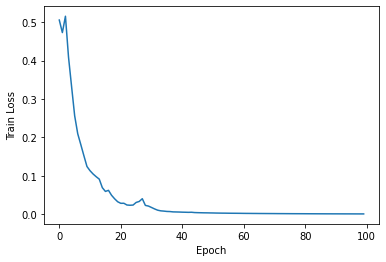

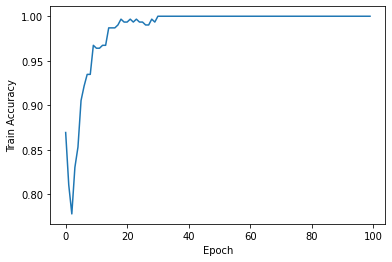

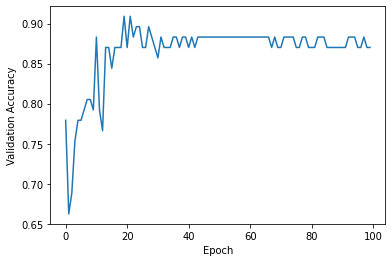




Confusion Matrix:
 [[0.53246753 0.12987013]
 [0.         0.33766234]]




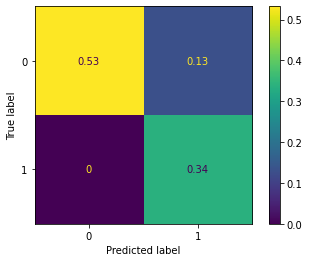

In [ ]:
X_Train , X_Valid , Y_Train , Y_Valid = train_test_split( Inputs , Labels , test_size= 0.2 , shuffle = True , random_state = 13 )

History = My_Model.fit(X_Train , Y_Train, epochs = 100 ,validation_data = (X_Valid ,Y_Valid) )
plt.plot(History.history['loss'] , label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.show()

plt.plot(History.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.show()

plt.plot(History.history['val_accuracy'], label = 'Validation Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.show()

print("\n\n")

Conf_mat =  confusion_matrix (Y_Valid, np.round(My_Model.predict(X_Valid)) ,  normalize='all') 
print('Confusion Matrix:\n', Conf_mat)

disp = ConfusionMatrixDisplay(confusion_matrix=Conf_mat , display_labels=[0 , 1])
disp.plot()
print("\n")
plt.show()


In [ ]:
score = My_Model.evaluate(X_Valid, Y_Valid, verbose = 0)
print('Valid loss:', score[0])
print('Valid accuracy:', score[1])

f1 = 2 * ( (History.history['val_recall_7'][-1] * History.history['val_accuracy'][-1] ) / ( History.history['val_recall_7'][-1] + History.history['val_accuracy'][-1]) )
print(f"f1_Score On Valid = {f1}")


Valid loss: 0.8019298911094666
Valid accuracy: 0.8701298832893372
f1_Score On Valid = 0.9305555630808718
